In [1]:
import keras
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from models.lenet_official import LeNet
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from dataset_loaders import SimpleDatasetLoader
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
sdl = SimpleDatasetLoader()

In [3]:
image_paths = list(paths.list_images('./datasets/digits'))

In [4]:
(data, labels) = sdl.load(image_paths, verbose=500)

[INFO] processed 500/2301
[INFO] processed 1000/2301
[INFO] processed 1500/2301
[INFO] processed 2000/2301


In [5]:
data = data.astype("float") / 255.0

In [6]:
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28), (1725,), (576, 28, 28), (576,))

In [8]:
y_train = LabelBinarizer().fit_transform(y_train)

In [9]:
y_test = LabelBinarizer().fit_transform(y_test)

In [10]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28), (1725, 10), (576, 28, 28), (576, 10))

In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [12]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1725, 28, 28, 1), (1725, 10), (576, 28, 28, 1), (576, 10))

In [14]:
opt = SGD(lr=0.01)

In [15]:
model = LeNet.build(width=28, height=28, depth=1, num_classes=10)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [17]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('models/best_weights.hdf5', monitor="val_loss", save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [18]:
H = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test),  
              epochs=100, verbose=1, callbacks=callbacks)

Train on 1725 samples, validate on 576 samples
Epoch 1/100
1725/1725 [==============================] - 1s 841us/step - loss: 2.2940 - acc: 0.1438 - val_loss: 2.2712 - val_acc: 0.1493

Epoch 00001: val_loss improved from inf to 2.27117, saving model to models/best_weights.hdf5
Epoch 2/100
1725/1725 [==============================] - 0s 213us/step - loss: 2.2780 - acc: 0.1525 - val_loss: 2.2612 - val_acc: 0.1493

Epoch 00002: val_loss improved from 2.27117 to 2.26121, saving model to models/best_weights.hdf5
Epoch 3/100
1725/1725 [==============================] - 0s 209us/step - loss: 2.2661 - acc: 0.1739 - val_loss: 2.2447 - val_acc: 0.1545

Epoch 00003: val_loss improved from 2.26121 to 2.24474, saving model to models/best_weights.hdf5
Epoch 4/100
1725/1725 [==============================] - 0s 215us/step - loss: 2.2497 - acc: 0.1919 - val_loss: 2.2305 - val_acc: 0.2014

Epoch 00004: val_loss improved from 2.24474 to 2.23045, saving model to models/best_weights.hdf5
Epoch 5/100
1725/

1725/1725 [==============================] - 0s 212us/step - loss: 0.1256 - acc: 0.9739 - val_loss: 0.1005 - val_acc: 0.9826

Epoch 00036: val_loss did not improve from 0.09796
Epoch 37/100
1725/1725 [==============================] - 0s 218us/step - loss: 0.1129 - acc: 0.9774 - val_loss: 0.0972 - val_acc: 0.9826

Epoch 00037: val_loss improved from 0.09796 to 0.09720, saving model to models/best_weights.hdf5
Epoch 38/100
1725/1725 [==============================] - 0s 212us/step - loss: 0.1092 - acc: 0.9814 - val_loss: 0.0958 - val_acc: 0.9844

Epoch 00038: val_loss improved from 0.09720 to 0.09581, saving model to models/best_weights.hdf5
Epoch 39/100
1725/1725 [==============================] - 0s 207us/step - loss: 0.1111 - acc: 0.9814 - val_loss: 0.0911 - val_acc: 0.9844

Epoch 00039: val_loss improved from 0.09581 to 0.09105, saving model to models/best_weights.hdf5
Epoch 40/100
1725/1725 [==============================] - 0s 208us/step - loss: 0.1083 - acc: 0.9745 - val_loss: 0.

1725/1725 [==============================] - 0s 213us/step - loss: 0.0489 - acc: 0.9896 - val_loss: 0.0915 - val_acc: 0.9878

Epoch 00077: val_loss did not improve from 0.08482
Epoch 78/100
1725/1725 [==============================] - 0s 211us/step - loss: 0.0538 - acc: 0.9878 - val_loss: 0.0871 - val_acc: 0.9878

Epoch 00078: val_loss did not improve from 0.08482
Epoch 79/100
1725/1725 [==============================] - 0s 217us/step - loss: 0.0525 - acc: 0.9890 - val_loss: 0.0882 - val_acc: 0.9878

Epoch 00079: val_loss did not improve from 0.08482
Epoch 80/100
1725/1725 [==============================] - 0s 214us/step - loss: 0.0428 - acc: 0.9948 - val_loss: 0.0893 - val_acc: 0.9878

Epoch 00080: val_loss did not improve from 0.08482
Epoch 81/100
1725/1725 [==============================] - 0s 211us/step - loss: 0.0433 - acc: 0.9948 - val_loss: 0.0910 - val_acc: 0.9861

Epoch 00081: val_loss did not improve from 0.08482
Epoch 82/100
1725/1725 [==============================] - 0s 22

In [19]:
predictions = model.predict(x_test, batch_size=32)

In [20]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), 
                      target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99        86
          1       0.98      0.98      0.98        63
          2       1.00      1.00      1.00        75
          3       0.98      0.96      0.97        49
          4       1.00      0.98      0.99        51
          5       1.00      1.00      1.00        43
          6       1.00      1.00      1.00        43
          7       0.98      1.00      0.99        53
          8       0.96      0.98      0.97        53
          9       0.97      0.95      0.96        60

avg / total       0.99      0.99      0.99       576



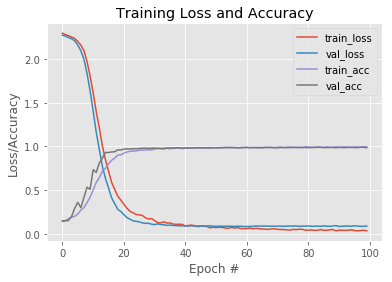

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()